***IUD How Deep Can Monkeys Learn***

### Step 1: Importing Libraries

We begin by importing the essential Python libraries for our analysis:

- **pandas**: Used for handling and analyzing tabular datasets (e.g., visitation and climate data).  
- **numpy**: Provides mathematical functions and array operations for numerical analysis.  
- **matplotlib.pyplot**: A plotting library for creating basic graphs and visualizations.  
- **seaborn**: A statistical visualization library built on top of matplotlib, making plots more attractive and easier to interpret.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Loading the Datasets

Next, we load the provided Excel file, which contains multiple sheets with different data sources:

- **Sheet 1 → Visitation Data (`visit_df`)**  
  Contains information on ski resort visitation numbers, helping us understand demand patterns across different times.  

- **Sheet 2 → Climate Data (`climate_df`)**  
  Includes historical climate information (temperature, rainfall, etc.), which we will use to assess snow and weather conditions.  


In [4]:
visit_df = pd.read_excel("2025 Allianz Datathon Dataset.xlsx", sheet_name = 1)
climate_df = pd.read_excel("2025 Allianz Datathon Dataset.xlsx", sheet_name = 2)

In [ ]:
visit_df.head() #Previewing the Visitation Data

,Year,Week,Mt. Baw Baw,Mt. Stirling,Mt. Hotham,Falls Creek,Mt. Buller,Selwyn,Thredbo,Perisher,Charlotte Pass
0,2014,1,555,60,3483,2790,8296,1041,5535,7370,408
1,2014,2,804,42,1253,1425,1987,383,2090,2751,151
2,2014,3,993,30,2992,2101,2413,597,3216,4255,230
3,2014,4,2976,165,9680,9544,18831,2877,15497,20265,1134
4,2014,5,11112,645,29628,26211,49217,8588,46546,61339,3403


In [ ]:
climate_df.head() #Previewing the climate Data

,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Minimum temperature (Degree C),Rainfall amount (millimetres)
0,71075,2010,1,1,NaN,NaN,NaN
1,71075,2010,1,2,NaN,NaN,NaN
2,71075,2010,1,3,NaN,NaN,NaN
3,71075,2010,1,4,NaN,NaN,NaN
4,71075,2010,1,5,NaN,NaN,NaN


### Step 3: EDA  

We calculate and visualize the total visitation across all resorts:  

- **`visitor_totals`**: The total number of visitor days at each mountain.  
- **`visitor_means`**: The average number of visitor days at each mountain.  
- A bar chart is plotted to clearly compare total visitation across resorts.  

In [5]:
mountains = visit_df.columns.tolist()[2:]  #Extracting Resort Names
mountains

['Mt. Baw Baw',
 'Mt. Stirling',
 'Mt. Hotham',
 'Falls Creek',
 'Mt. Buller',
 'Selwyn',
 'Thredbo',
 'Perisher',
 'Charlotte Pass']

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Mt. Baw Baw'),
  Text(1, 0, 'Mt. Stirling'),
  Text(2, 0, 'Mt. Hotham'),
  Text(3, 0, 'Falls Creek'),
  Text(4, 0, 'Mt. Buller'),
  Text(5, 0, 'Selwyn'),
  Text(6, 0, 'Thredbo'),
  Text(7, 0, 'Perisher'),
  Text(8, 0, 'Charlotte Pass')])

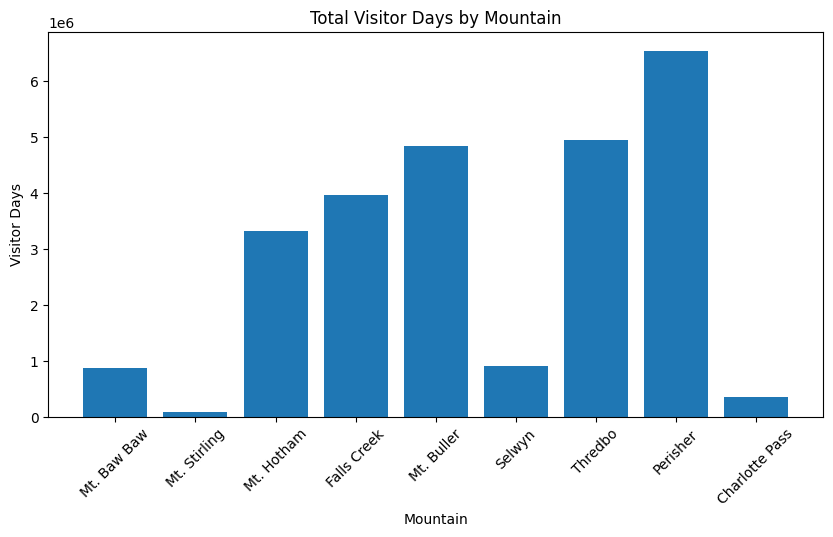

In [ ]:
visitor_totals = []
visitor_means = []


# Calculate total and average visitors for each resort
for mountain in mountains:
  visitor_totals.append(visit_df[mountain].sum())
  visitor_means.append(visit_df[mountain].mean())

# Plot total visitor days per resort
plt.figure(figsize = (10, 5))
plt.bar(mountains, visitor_totals)
plt.xlabel("Mountain")
plt.ylabel("Visitor Days")
plt.title("Total Visitor Days by Mountain")
plt.xticks(rotation = 45)

The bar chart above shows **total visitor days by mountain**.  

- **Perisher** stands out as the most visited resort, with over 6 million visitor days.  
- **Thredbo** and **Mt. Buller** also attract large numbers of visitors, making them key competitors.  
- Smaller resorts like **Mt. Stirling** and **Charlotte Pass** receive significantly fewer visitors.  

This highlights clear differences in resort popularity, which we must balance with climate and pricing data when recommending the ultimate ski holiday.  

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Mt. Baw Baw'),
  Text(1, 0, 'Mt. Stirling'),
  Text(2, 0, 'Mt. Hotham'),
  Text(3, 0, 'Falls Creek'),
  Text(4, 0, 'Mt. Buller'),
  Text(5, 0, 'Selwyn'),
  Text(6, 0, 'Thredbo'),
  Text(7, 0, 'Perisher'),
  Text(8, 0, 'Charlotte Pass')])

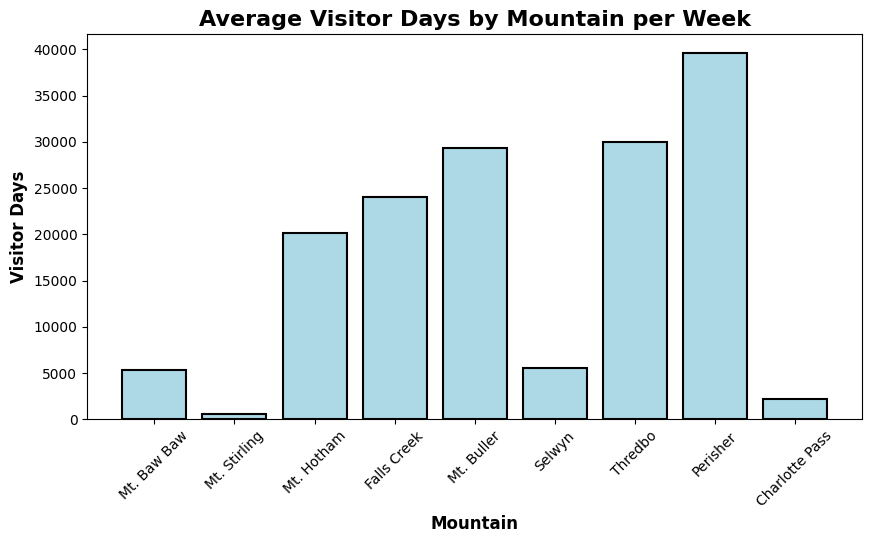

In [ ]:
# Plot bar chart of weekly averages
plt.figure(figsize = (10, 5))

plt.bar(mountains, visitor_means, color="lightblue", edgecolor="black", linewidth=1.5)
plt.xlabel("Mountain", fontsize = 12, weight = 'bold')
plt.ylabel("Visitor Days", fontsize = 12, weight = 'bold')
plt.title("Average Visitor Days by Mountain per Week", fontsize = 16, weight = 'bold')
plt.xticks(rotation = 45)

The chart shows the **average weekly visitor days** for each mountain:  

- **Perisher** again leads, averaging nearly **40,000 visitor days per week**, making it the busiest resort.  
- **Thredbo** and **Mt. Buller** follow closely, each averaging around **30,000 visitor days per week**.  
- Resorts like **Mt. Stirling** and **Charlotte Pass** see very low weekly averages, indicating they are niche or less popular destinations.  

📌 This normalized view (weekly averages) confirms the same popularity ranking as total visitors but also highlights **relative demand pressure** at each resort.

In [ ]:
climate_df['Bureau of Meteorology station number'].unique()

array([71075, 71032, 83024, 83084, 83085, 85291, 72161])

In [ ]:
baw_trails = 13
stirling_trails = 14
hotham_trails = 105
falls_trails = 90
buller_trails = 81
selwyn_trails = 24
thredbo_trails = 53
perisher_trails = 112
charlotte_trails = 25

baw_terrain = [0.23, 0.54, 0.23]
stirling_terrain = [0.36, 0.43, 0.21]
hotham_terrain = [0.08, 0.38, 0.54]
falls_terrain = [0.17, 0.6, 0.23]
buller_terrain = [0.05, 0.41, 0.54]
selwyn_terrain = [0.29, 0.42, 0.29]
thredbo_terrain = [0.3, 0.34, 0.36]
perisher_terrain = [0.42, 0.38, 0.2]
charlotte_terrain = [0.32, 0.28, 0.4]

visit_df["Baw PPT"] = visit_df["Mt. Baw Baw"]/(sum(baw_terrain[:2]) * baw_trails)
visit_df["Stirling PPT"] = visit_df["Mt. Stirling"]/(sum(stirling_terrain[:2]) * stirling_trails)
visit_df["Hotham PPT"] = visit_df["Mt. Hotham"]/(sum(hotham_terrain[:2]) * hotham_trails)
visit_df["Falls PPT"] = visit_df["Falls Creek"]/(sum(falls_terrain[:2]) * falls_trails)
visit_df["Buller PPT"] = visit_df["Mt. Buller"]/(sum(buller_terrain[:2]) * buller_trails)
visit_df["Selwyn PPT"] = visit_df["Selwyn"]/(sum(selwyn_terrain[:2]) * selwyn_trails)
visit_df["Thredbo PPT"] = visit_df["Thredbo"]/(sum(thredbo_terrain[:2]) * thredbo_trails)
visit_df["Perisher PPT"] = visit_df["Perisher"]/(sum(perisher_terrain[:2]) * perisher_trails)
visit_df["Charlotte PPT"] = visit_df["Charlotte Pass"]/(sum(charlotte_terrain[:2]) * charlotte_trails)

visit_df.head()

,Year,Week,Mt. Baw Baw,Mt. Stirling,Mt. Hotham,Falls Creek,Mt. Buller,Selwyn,Thredbo,Perisher,Charlotte Pass,Baw PPT,Stirling PPT,Hotham PPT,Falls PPT,Buller PPT,Selwyn PPT,Thredbo PPT,Perisher PPT,Charlotte PPT
0,2014,1,555,60,3483,2790,8296,1041,5535,7370,408,55.444555,5.424955,72.111801,40.259740,222.651637,61.091549,163.178066,82.254464,27.200000
1,2014,2,804,42,1253,1425,1987,383,2090,2751,151,80.319680,3.797468,25.942029,20.562771,53.327966,22.476526,61.615566,30.703125,10.066667
2,2014,3,993,30,2992,2101,2413,597,3216,4255,230,99.200799,2.712477,61.946170,30.317460,64.761138,35.035211,94.811321,47.488839,15.333333
3,2014,4,2976,165,9680,9544,18831,2877,15497,20265,1134,297.302697,14.918626,200.414079,137.720058,505.394525,168.838028,456.869104,226.171875,75.600000
4,2014,5,11112,645,29628,26211,49217,8588,46546,61339,3403,1110.089910,58.318264,613.416149,378.225108,1320.907139,503.990610,1372.228774,684.587054,226.866667


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Mt. Baw Baw'),
  Text(1, 0, 'Mt. Stirling'),
  Text(2, 0, 'Mt. Hotham'),
  Text(3, 0, 'Falls Creek'),
  Text(4, 0, 'Mt. Buller'),
  Text(5, 0, 'Selwyn'),
  Text(6, 0, 'Thredbo'),
  Text(7, 0, 'Perisher'),
  Text(8, 0, 'Charlotte Pass')])

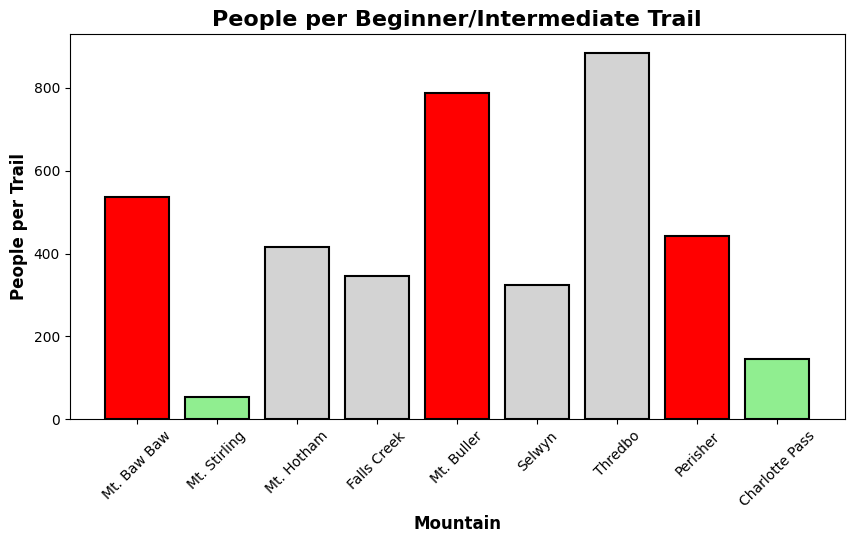

In [ ]:
all_ppts = visit_df.columns.tolist()[-9:]
ppt_means = []
for ppt in all_ppts:
    ppt_means.append(visit_df[ppt].mean())

plt.figure(figsize = (10, 5))

plt.bar(mountains, ppt_means, edgecolor="black", linewidth=1.5, color = ["red", "lightgreen", "lightgrey", "lightgrey", "red", "lightgrey", "lightgrey", "red", "lightgreen"] )
plt.xlabel("Mountain", fontsize = 12, weight = 'bold')
plt.ylabel("People per Trail", fontsize = 12, weight = 'bold')
plt.title("People per Beginner/Intermediate Trail", fontsize = 16, weight = 'bold')
plt.xticks(rotation = 45)

Thredbo and Mt. Buller are the most crowded, while Mt. Stirling and Charlotte Pass are the least crowded for beginner and intermediate trails.

Text(0.5, 1.0, 'People per Beginner or Intermediate Trail in Mt. Baw')

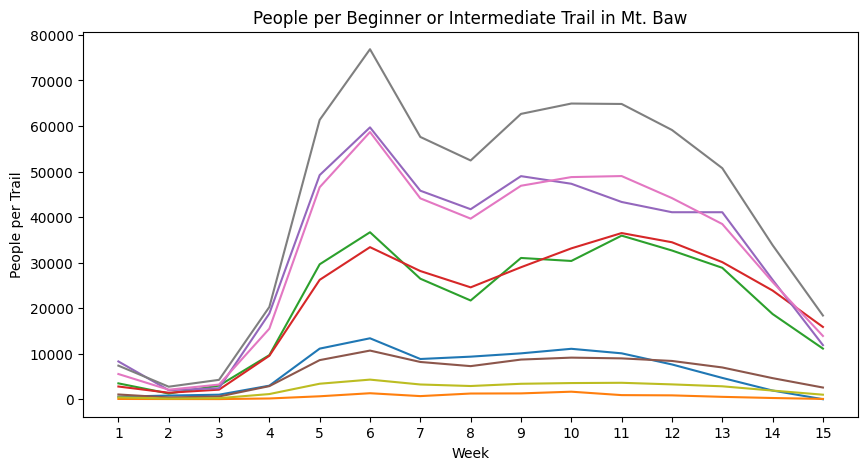

In [ ]:
plt.figure(figsize = (10, 5))

for mountain in mountains:
    plt.plot(visit_df["Week"].head(15), visit_df[mountain].head(15), label=mountain)

plt.xticks(visit_df["Week"].head(15))
plt.xlabel("Week")
plt.ylabel("People per Trail")
plt.title("People per Beginner or Intermediate Trail in Mt. Baw")

Trail usage at Mt. Baw peaks around Week 6 and then gradually declines towards the end of the season.

In [ ]:
visit_df["Year"].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

Text(0.5, 1.0, 'People per Beginner/Intermediate Trail at each Mountain from 2014-2024')

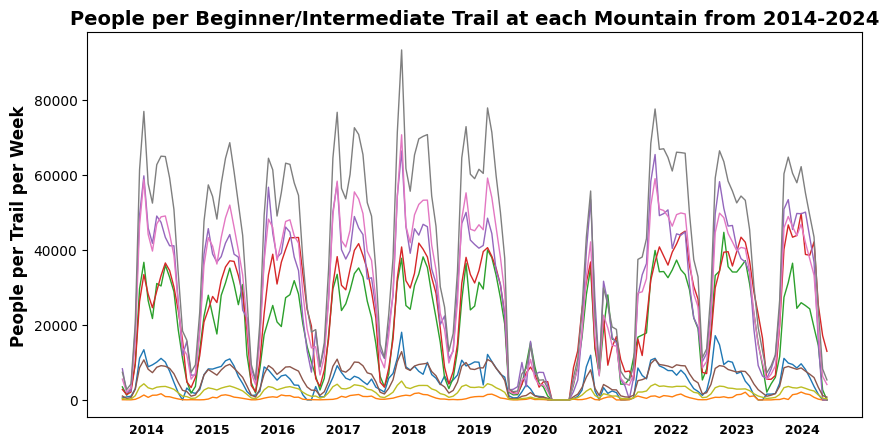

In [ ]:
week_and_days = []
for number in range(1, 166):
    week_and_days.append(number)

plt.figure(figsize = (10, 5))

for mountain in mountains:
    plt.plot(week_and_days, visit_df[mountain], label=mountain, linewidth = 1)

plt.xticks([])
plt.xlabel("2014       2015       2016       2017       2018       2019       2020       2021       2022       2023       2024", fontsize = 9, weight = 'bold')
plt.ylabel("People per Trail per Week", fontsize = 12, weight = 'bold')
plt.title("People per Beginner/Intermediate Trail at each Mountain from 2014-2024", fontsize = 14, weight = 'bold')

Text(0.5, 1.0, 'People per Beginner/Intermediate Trail at each Mountain in 2024')

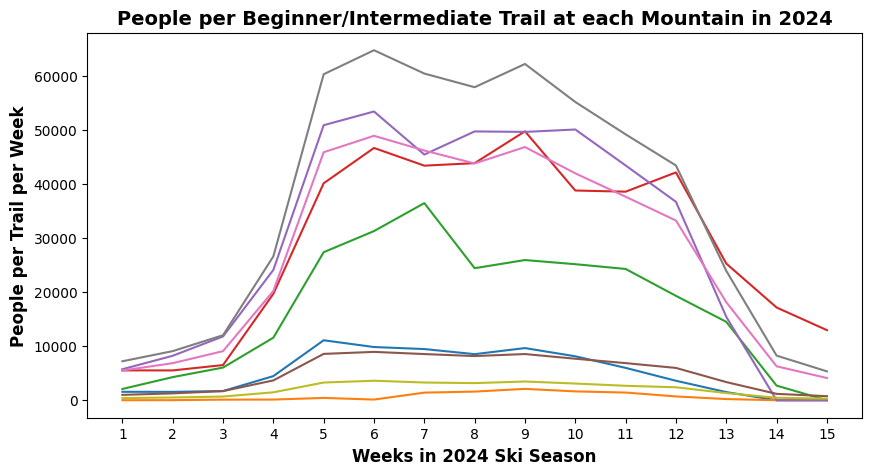

In [ ]:
plt.figure(figsize = (10, 5))


for mountain in mountains:
    plt.plot(visit_df[visit_df["Year"] == 2024]["Week"], visit_df[visit_df["Year"] == 2024][mountain], label=mountain)

plt.xticks(visit_df[visit_df["Year"] == 2024]["Week"])
plt.xlabel("Weeks in 2024 Ski Season", fontsize = 12, weight = 'bold')
plt.ylabel("People per Trail per Week", fontsize = 12, weight = 'bold')
plt.title("People per Beginner/Intermediate Trail at each Mountain in 2024", fontsize = 14, weight = 'bold')

From 2014–2024, Thredbo, Buller, and Perisher were consistently the most crowded resorts, while Charlotte Pass and Mt. Stirling remained the quietest, with a clear seasonal pattern and a sharp decline in 2020

In [ ]:
baw_price = 460
stirling_price = 67*7
hotham_price = 1083
falls_price = 1083
buller_price = 573
selwyn_price = 833
thredbo_price = 1099
perisher_price = 1773
charlotte_price = 1004

prices = [baw_price, stirling_price, hotham_price, falls_price, buller_price, selwyn_price, thredbo_price, perisher_price, charlotte_price]

Text(0.5, 1.0, 'Weekly Lift Price per Mountain')

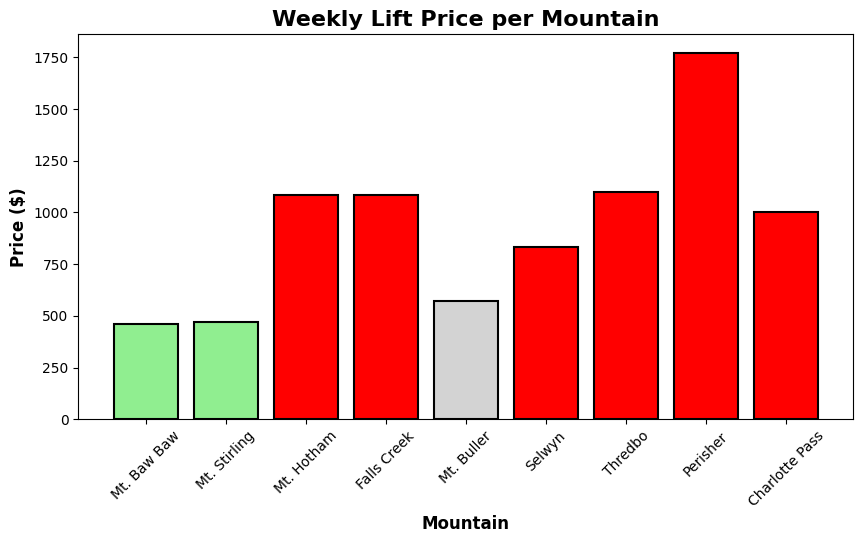

In [ ]:
plt.figure(figsize= (10,5))
bars = plt.bar(mountains, prices, edgecolor="black", linewidth=1.5, color = ["lightgreen", "lightgreen", "red", "red", "lightgrey", "red", "red", "red", "red"])
plt.xticks(rotation = 45)
plt.xlabel("Mountain", fontsize = 12, weight = 'bold')
plt.ylabel("Price ($)", fontsize = 12, weight = 'bold')
plt.title("Weekly Lift Price per Mountain", fontsize = 16, weight = 'bold')

Lift passes are cheapest at Mt. Baw Baw and Mt. Stirling, while Perisher is by far the most expensive, costing almost four times more.

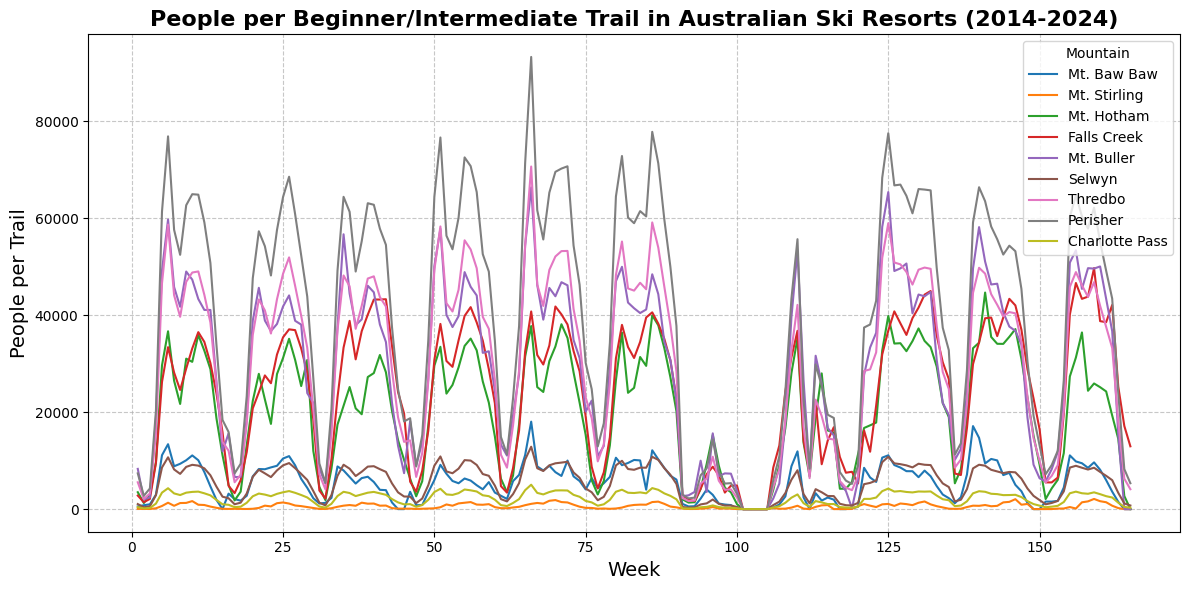

In [ ]:
import matplotlib.pyplot as plt

# List of mountains
mountains = ['Mt. Baw Baw', 'Mt. Stirling', 'Mt. Hotham', 'Falls Creek', 'Mt. Buller', 'Selwyn', 'Thredbo', 'Perisher', 'Charlotte Pass']

# Create the figure
plt.figure(figsize=(12, 6))

# Loop through each mountain and plot its data
for mountain in mountains:
    plt.plot(week_and_days, visit_df[mountain], label=mountain)

# Add labels and title
plt.xlabel("Week", fontsize=14)
plt.ylabel("People per Trail", fontsize=14)
plt.title("People per Beginner/Intermediate Trail in Australian Ski Resorts (2014-2024)", fontsize=16, weight='bold')

# Add a legend to identify each mountain
plt.legend(title="Mountain", fontsize=10)

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
baw_dist = 144
stirling_dist = 233
hotham_dist = 390
falls_dist = 410
buller_dist = 230
selwyn_dist = 574
thredbo_dist = 572
perisher_dist = 632
charlotte_dist = 641

distances = [baw_dist, stirling_dist, hotham_dist, falls_dist, buller_dist, selwyn_dist, thredbo_dist, perisher_dist, charlotte_dist]

Text(0.5, 1.0, 'Distance from Monash for each Mountain')

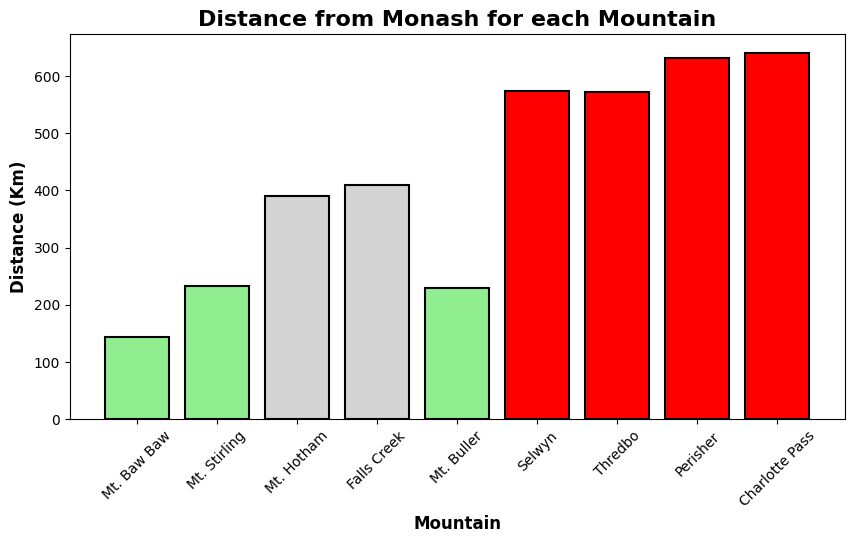

In [ ]:
plt.figure(figsize = (10,5))

plt.bar(mountains, distances, edgecolor="black", linewidth=1.5, color = ["lightgreen", "lightgreen", "lightgrey", "lightgrey", "lightgreen", "red", "red", "red", "red"])
plt.xticks(rotation = 45)
plt.xlabel("Mountain", fontsize = 12, weight = 'bold')
plt.ylabel("Distance (Km)", fontsize = 12, weight = 'bold')
plt.title("Distance from Monash for each Mountain", fontsize = 16, weight = 'bold')

Mt. Baw Baw, Stirling, and Buller are the most accessible from Monash, while Perisher and Charlotte Pass are the furthest away.

**Weather Forecast**

1. Use the Climate_sheet dataset
2. Dropped missing values to ensure the dataset is clean and usable for forecasting models.
* Time series requires ordered data → Random shuffling would break the sequence structure.

* Datetime index allows forecasting models (LSTM, ARIMA, Prophet, etc.) to capture seasonality and trends properly.

* Average temperature smooths extremes → better predictor for climate-related visitation forecasting.

* Date-based train/test split avoids data leakage → ensures the model only sees the past when predicting the future.

In [7]:
import pandas as pd

In [8]:
file_path = "2025 Allianz Datathon Dataset.xlsx"
visitation = pd.read_excel(file_path, sheet_name="Visitation Data")
climate = pd.read_excel(file_path, sheet_name="Climate Data")

In [9]:
climate.head()

,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Minimum temperature (Degree C),Rainfall amount (millimetres)
0,71075,2010,1,1,NaN,NaN,NaN
1,71075,2010,1,2,NaN,NaN,NaN
2,71075,2010,1,3,NaN,NaN,NaN
3,71075,2010,1,4,NaN,NaN,NaN
4,71075,2010,1,5,NaN,NaN,NaN


In [10]:
stations = {
    71032: "Thredbo",
    71075: "Perisher",
    72161: "Cabramurra",
    83024: "Mt Buller",
    83084: "Falls Creek",
    83085: "Mt Hotham",
    85291: "Mt Baw Baw"
}

climate["Resort"] = climate["Bureau of Meteorology station number"].map(stations)

In [11]:
climate.head()

,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Minimum temperature (Degree C),Rainfall amount (millimetres),Resort
0,71075,2010,1,1,NaN,NaN,NaN,Perisher
1,71075,2010,1,2,NaN,NaN,NaN,Perisher
2,71075,2010,1,3,NaN,NaN,NaN,Perisher
3,71075,2010,1,4,NaN,NaN,NaN,Perisher
4,71075,2010,1,5,NaN,NaN,NaN,Perisher


In [12]:
climate.isnull().sum()

,0
Bureau of Meteorology station number,0
Year,0
Month,0
Day,0
Maximum temperature (Degree C),1538
Minimum temperature (Degree C),1533
Rainfall amount (millimetres),1956
Resort,0


In [13]:
# Show all column names
print(climate.columns.tolist())

# Strip spaces from column names
climate.columns = climate.columns.str.strip()

['Bureau of Meteorology station number', 'Year', 'Month', 'Day', 'Maximum temperature (Degree C)', 'Minimum temperature (Degree C)', 'Rainfall amount (millimetres)', 'Resort']


In [14]:
climate = climate.dropna(
    subset=["Maximum temperature (Degree C)",
            "Minimum temperature (Degree C)",
            "Rainfall amount (millimetres)"]
).reset_index(drop=True)
climate.isnull().sum()

,0
Bureau of Meteorology station number,0
Year,0
Month,0
Day,0
Maximum temperature (Degree C),0
Minimum temperature (Degree C),0
Rainfall amount (millimetres),0
Resort,0


In [15]:
# Create separate DataFrames for each station
climate_perisher            = climate[climate["Bureau of Meteorology station number"] == 71075]
climate_thredbo             = climate[climate["Bureau of Meteorology station number"] == 71032]
climate_buller_stirling     = climate[climate["Bureau of Meteorology station number"] == 83024]
climate_falls_creek         = climate[climate["Bureau of Meteorology station number"] == 83084]
climate_hotham_selwyn       = climate[climate["Bureau of Meteorology station number"] == 83085]
climate_bawbaw              = climate[climate["Bureau of Meteorology station number"] == 85291]
climate_charlotte_cabramurra = climate[climate["Bureau of Meteorology station number"] == 72161]

In [16]:
climate["Date"] = pd.to_datetime(
    climate[["Year", "Month", "Day"]]
)

In [17]:
# Create Date column
climate["Date"] = pd.to_datetime(climate[["Year", "Month", "Day"]])

# Create daily average temperature
climate["AvgTemp"] = (
    climate["Maximum temperature (Degree C)"]
    + climate["Minimum temperature (Degree C)"]
) / 2

In [18]:
# Ensure AvgTemp is numeric
climate["AvgTemp"] = pd.to_numeric(climate["AvgTemp"], errors="coerce")

# Build time series with Date as index, drop NaN, sort
ts = climate.set_index("Date")["AvgTemp"].dropna().astype(float)
ts = ts.sort_index()

# Train/test split by date
train = ts.loc[:'2023-12-31'] # 2010-2023
test  = ts.loc['2024-01-01':] # 2024-2025

In [20]:
def rain_stats(df, resort_name, rain_col="Rainfall amount (millimetres)"):
    total_days = len(df)
    rain_days = (df[rain_col] > 0).sum()
    rain_pct = 100 * rain_days / total_days if total_days > 0 else 0
    print(f"{resort_name}: {rain_days}/{total_days} days with rain ({rain_pct:.2f}%)")

# Run for each resort
rain_stats(climate_perisher, "Perisher")
rain_stats(climate_thredbo, "Thredbo")
rain_stats(climate_buller_stirling, "Buller & Stirling")
rain_stats(climate_falls_creek, "Falls Creek")
rain_stats(climate_hotham_selwyn, "Hotham & Selwyn")
rain_stats(climate_bawbaw, "Baw Baw")
rain_stats(climate_charlotte_cabramurra, "Charlotte Pass & Cabramurra")

Perisher: 2525/5429 days with rain (46.51%)
Thredbo: 2537/5369 days with rain (47.25%)
Buller & Stirling: 2613/5513 days with rain (47.40%)
Falls Creek: 2495/5201 days with rain (47.97%)
Hotham & Selwyn: 2382/4679 days with rain (50.91%)
Baw Baw: 2797/5196 days with rain (53.83%)
Charlotte Pass & Cabramurra: 2032/5433 days with rain (37.40%)


Most Rain-Prone Resort: Baw Baw → ~54% of days had rainfall (more than half).

Least Rain-Prone Resort: Charlotte Pass & Cabramurra → only ~37% of days had rainfall.

Others: Perisher, Thredbo, Buller, Falls Creek ~46–48% → moderate rainfall frequency.

Hotham & Selwyn: ~51% → also relatively rainy.

On average, Baw Baw experiences rain on more than half the days, while Charlotte Pass & Cabramurra are the driest locations, with rain on only about one-third of days.

**Prophet**

Handles seasonality well (annual cycles of temperature).

Captures long-term trends (warming/cooling over years).

Flexible: automatically decomposes into trend + seasonality + residuals.

Robust with missing values and outliers, unlike ARIMA/LSTM.

Prophet captures Perisher’s strong annual seasonality and long-term warming trend, forecasting rising average temperatures into 2026 with clear winter-summer cycles.

In [ ]:
pip install prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7yki7wa/wv3r5e5o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7yki7wa/kkuy8ji6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21542', 'data', 'file=/tmp/tmpp7yki7wa/wv3r5e5o.json', 'init=/tmp/tmpp7yki7wa/kkuy8ji6.json', 'output', 'file=/tmp/tmpp7yki7wa/prophet_model6n9g_23c/prophet_model-20250831032835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:28:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:28:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


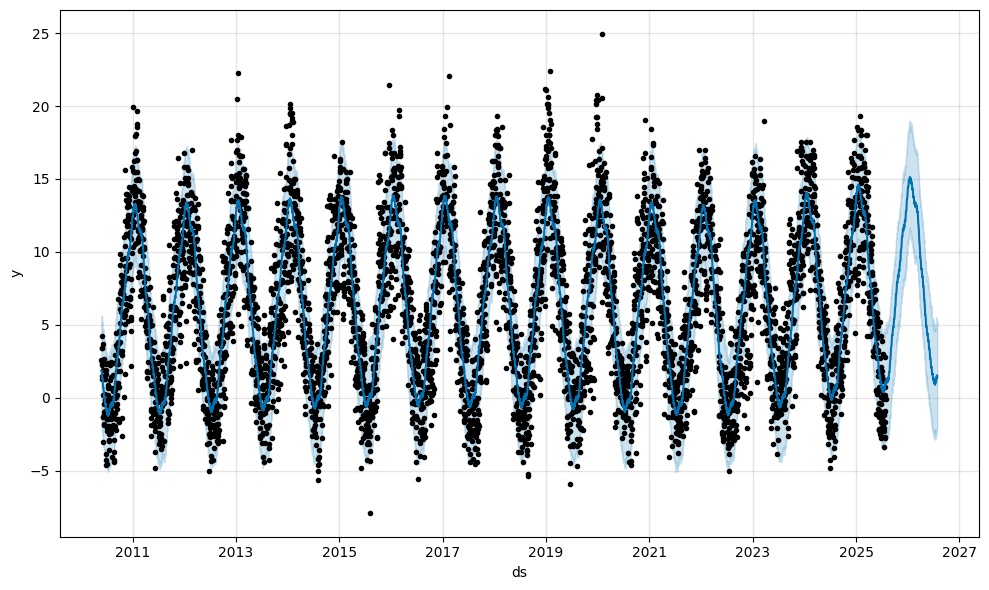

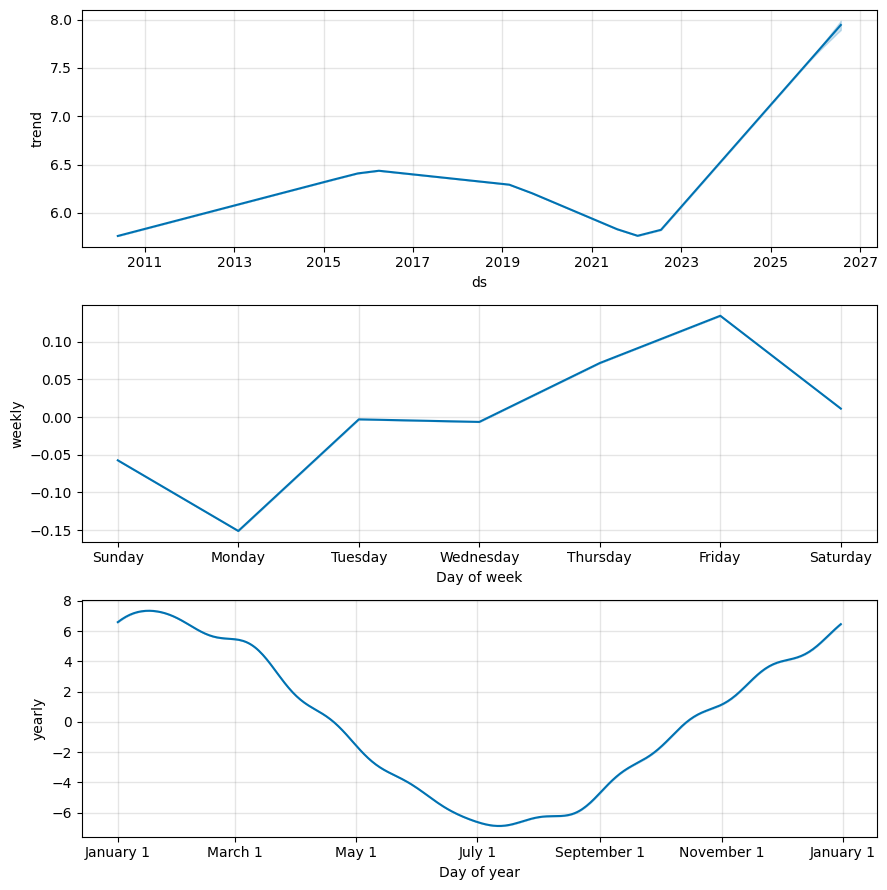

In [ ]:
from prophet import Prophet

# Filter dataset for Perisher
perisher = climate[climate["Resort"] == "Perisher"]
df_perisher = perisher[["Date", "AvgTemp"]].dropna().rename(columns={"Date": "ds", "AvgTemp": "y"})

# Create NEW Prophet model
model_perisher = Prophet(yearly_seasonality=True, daily_seasonality=False)
model_perisher.fit(df_perisher)

# Forecast 365 days into the future
future_perisher = model_perisher.make_future_dataframe(periods=365, freq="D")
forecast_perisher = model_perisher.predict(future_perisher)

# Plot forecast
fig1 = model_perisher.plot(forecast_perisher)
fig2 = model_perisher.plot_components(forecast_perisher)


In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

def prophet_forecast_all(climate, resorts, days=365, export_csv="forecast_2026_all_resorts.csv"):
    all_forecasts = []  # collect results for CSV

    plt.figure(figsize=(14,6))

    for resort in resorts:
        # Filter resort data
        df_resort = (climate[climate["Resort"] == resort][["Date", "AvgTemp"]]
                     .dropna()
                     .rename(columns={"Date": "ds", "AvgTemp": "y"}))

        # Train Prophet
        model = Prophet(yearly_seasonality=True, daily_seasonality=False)
        model.fit(df_resort)

        # Forecast into the future
        future = model.make_future_dataframe(periods=days, freq="D")
        forecast = model.predict(future)

        # Filter for 2026 only
        forecast_2026 = forecast[forecast["ds"].between("2026-01-01", "2026-12-31")]
        forecast_2026["Resort"] = resort

        # Save to list for CSV
        all_forecasts.append(forecast_2026[["ds", "Resort", "yhat", "yhat_lower", "yhat_upper"]])

        # Plot forecast
        plt.plot(forecast_2026["ds"], forecast_2026["yhat"], label=resort.lower())

    # Finalize plot
    plt.title("Prophet Forecast – AvgTemp for 2026 (All Resorts)")
    plt.xlabel("Date")
    plt.ylabel("AvgTemp (°C)")
    plt.legend()
    plt.show()

    # Combine all resort forecasts
    all_forecasts_df = pd.concat(all_forecasts, ignore_index=True)

    # Export to CSV
    all_forecasts_df.to_csv(export_csv, index=False)

    return all_forecasts_df


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7yki7wa/m2f7k8j6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7yki7wa/b2719m47.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97935', 'data', 'file=/tmp/tmpp7yki7wa/m2f7k8j6.json', 'init=/tmp/tmpp7yki7wa/b2719m47.json', 'output', 'file=/tmp/tmpp7yki7wa/prophet_model7cyhuw7u/prophet_model-20250831032939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:29:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:29:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/tmp/ipython-input-1721490552.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

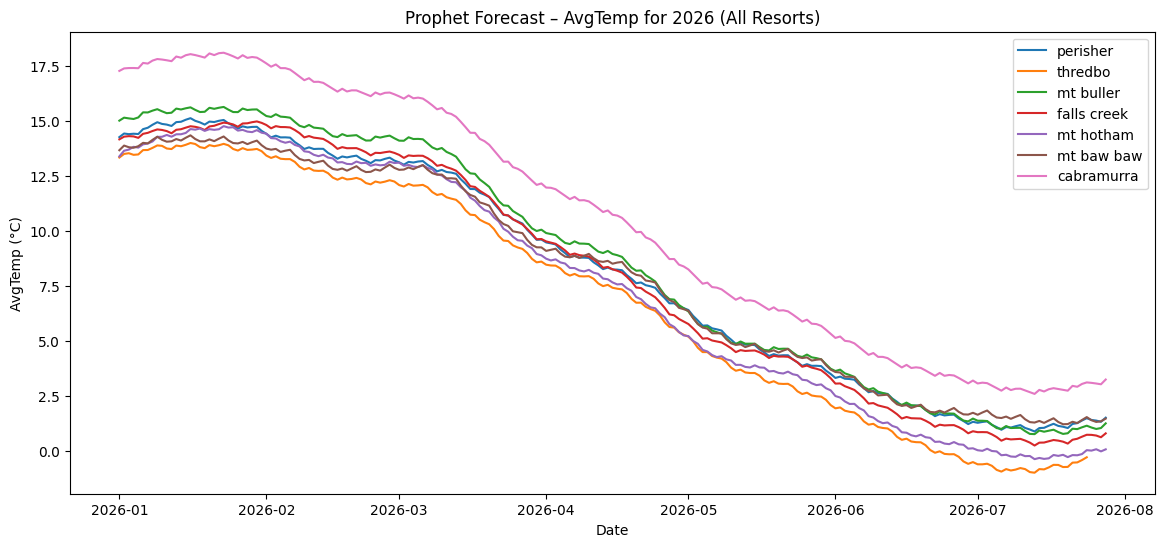

In [ ]:
resorts = ["Perisher", "Thredbo", "Mt Buller", "Falls Creek",
           "Mt Hotham", "Mt Baw Baw", "Cabramurra"]

forecast_results_df = prophet_forecast_all(climate, resorts, days=365)


In [ ]:
climate_2026 = forecast_2026_only(climate, resorts, days=730, export_csv="climate_2026.csv")

DEBUG:cmdstanpy:input tempfile: /tmp/tmpljsiqqs8/7wilp4ep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpljsiqqs8/guv6hthk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71332', 'data', 'file=/tmp/tmpljsiqqs8/7wilp4ep.json', 'init=/tmp/tmpljsiqqs8/guv6hthk.json', 'output', 'file=/tmp/tmpljsiqqs8/prophet_modelp8rb9s2d/prophet_model-20250830172501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:25:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:25:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpljsiqqs8/uk6f1xr1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpljsiqqs8/yaxl9w0r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Prophet captures Perisher’s strong annual seasonality and long-term warming trend, forecasting rising average temperatures into 2026 with clear winter-summer cycles.

**LSTM**
LSTM: Learns from data patterns, flexible but needs lots of data & tuning. Struggled here because seasonality is long-term (1 year) but input window was short.
But performed not really well.

LSTM missed long-term seasonal cycles due to a short input window, while Prophet captured them well because it directly models yearly seasonality and trend.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

TIME_STEPS = 30   # past 30 days to predic next day
EPOCHS = 20
BATCH_SIZE = 32

def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ts.values.reshape(-1, 1))


In [ ]:
X, y = create_sequences(scaled_data, TIME_STEPS)

# Train/test split
split = int(len(X) * 0.8)   # or by date if you prefer
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
model = Sequential([
    LSTM(64, activation="tanh", return_sequences=True, input_shape=(TIME_STEPS, 1)),
    Dropout(0.2),
    LSTM(32, activation="tanh"),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)


Epoch 1/20
950/950 ━━━━━━━━━━━━━━━━━━━━ 36s 34ms/step - loss: 0.0111 - val_loss: 0.0038
Epoch 2/20
950/950 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - loss: 0.0052 - val_loss: 0.0038
Epoch 3/20
950/950 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - loss: 0.0047 - val_loss: 0.0036
Epoch 4/20
950/950 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - loss: 0.0044 - val_loss: 0.0036
Epoch 5/20
950/950 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 6/20
950/950 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 7/20
950/950 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 8/20
950/950 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 9/20
950/950 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 10/20
950/950 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 11/20
950/950 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 12/20
950/950 ━━━━━━━━━━

In [ ]:
def predict_future(model, data, scaler, time_steps=TIME_STEPS, days=365):
    predictions = []
    last_seq = data[-time_steps:]  # start with last available window

    for _ in range(days):
        X = last_seq.reshape((1, time_steps, 1))
        y_pred = model.predict(X, verbose=0)
        predictions.append(y_pred[0,0])

        # update sequence
        last_seq = np.append(last_seq[1:], y_pred)

    # inverse transform to get °C
    return scaler.inverse_transform(np.array(predictions).reshape(-1,1)).flatten()


In [ ]:
future_2026 = predict_future(model, scaled_data, scaler, days=365)

# Generate dates for 2026
dates_2026 = pd.date_range(start="2026-01-01", periods=365, freq="D")

forecast_df = pd.DataFrame({"Date": dates_2026, "Forecast_AvgTemp": future_2026})


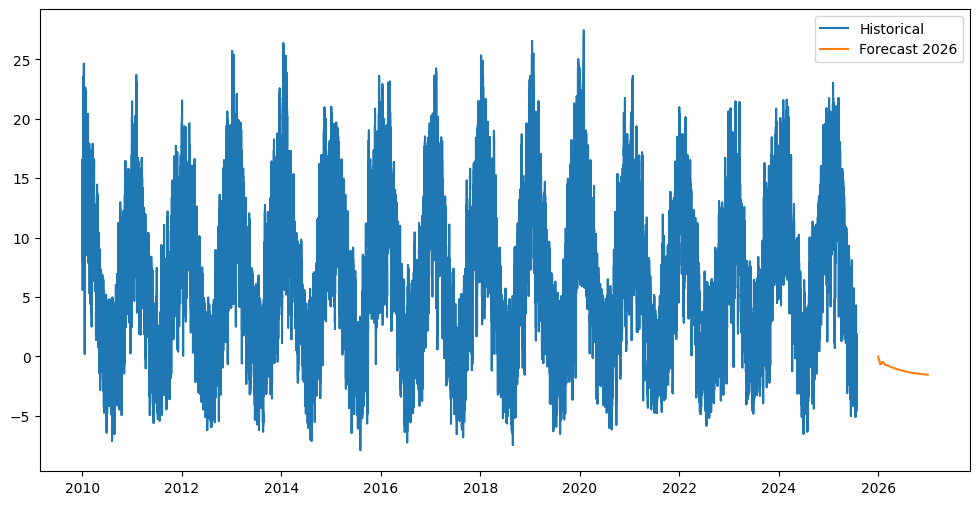

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ts.index, ts.values, label="Historical")
plt.plot(forecast_df["Date"], forecast_df["Forecast_AvgTemp"], label="Forecast 2026")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def lstm_forecast_resort(df_resort, resort_name):
    ts = df_resort.set_index("Date")["AvgTemp"].dropna().astype(float).sort_index()

    scaler = MinMaxScaler(feature_range=(0,1))
    ts_scaled = scaler.fit_transform(ts.values.reshape(-1,1))

    # Sequence
    X, y = create_sequences(ts_scaled, TIME_STEPS)

    # Train/test split
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(TIME_STEPS, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer="adam", loss="mse")

    history = model.fit(X_train, y_train,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        validation_split=0.1,
                        verbose=1)

    # Predictions
    y_pred = model.predict(X_test)

    # Inverse scaling
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Metrics
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    r2 = r2_score(y_test_inv, y_pred_inv)   # like "accuracy" for regression

    print(f"{resort_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")

    # Plot
    plt.figure(figsize=(10,4))
    plt.plot(y_test_inv, label="True")
    plt.plot(y_pred_inv, label="Predicted")
    plt.title(f"LSTM Forecast - {resort_name}")
    plt.legend()
    plt.show()

    return model, history, y_test_inv, y_pred_inv, mae, rmse, r2

Training LSTM for Cabramurra ...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0383 - val_loss: 0.0097
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0142 - val_loss: 0.0099
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0137 - val_loss: 0.0096
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0129 - val_loss: 0.0093
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0120 - val_loss: 0.0077
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0115 - val_loss: 0.0071
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0103 - val_loss: 0.0065
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0095 - val_loss: 0.0064
Epoch 9/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0087 - val_loss: 0.0060
Epoch 10/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0082 - val_loss: 0.0049
Epoch 11/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0086 - val_loss: 0.0046
Epoch 12/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/ste

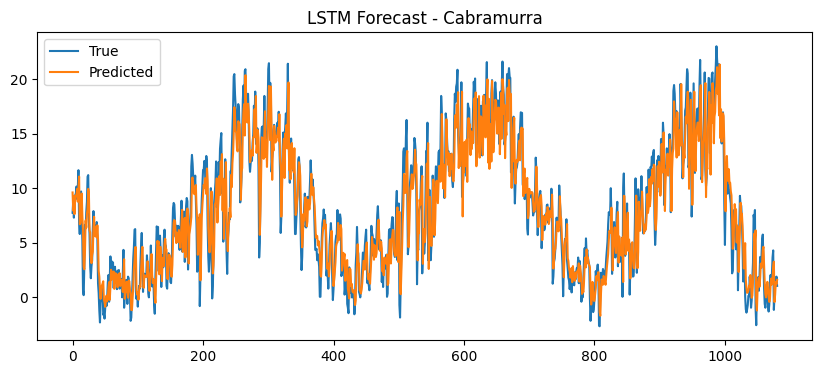

Training LSTM for Falls Creek ...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0283 - val_loss: 0.0104
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0148 - val_loss: 0.0096
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0141 - val_loss: 0.0101
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0130 - val_loss: 0.0085
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0126 - val_loss: 0.0080
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0108 - val_loss: 0.0070
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0097 - val_loss: 0.0064
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0093 - val_loss: 0.0058
Epoch 9/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0086 - val_loss: 0.0054
Epoch 10/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0085 - val_loss: 0.0055
Epoch 11/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0082 - val_loss: 0.0052
Epoch 12/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/ste

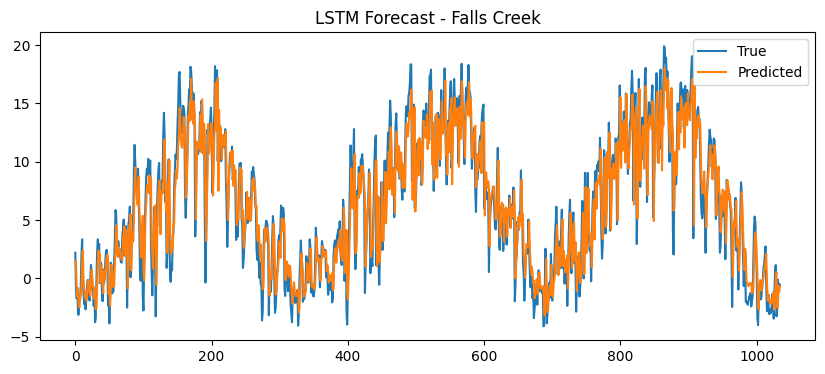

Training LSTM for Mt Baw Baw ...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0467 - val_loss: 0.0173
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0198 - val_loss: 0.0171
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0193 - val_loss: 0.0175
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0175 - val_loss: 0.0149
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0171 - val_loss: 0.0134
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0153 - val_loss: 0.0119
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0132 - val_loss: 0.0110
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0134 - val_loss: 0.0102
Epoch 9/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0129 - val_loss: 0.0100
Epoch 10/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0118 - val_loss: 0.0100
Epoch 11/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0120 - val_loss: 0.0111
Epoch 12/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/ste

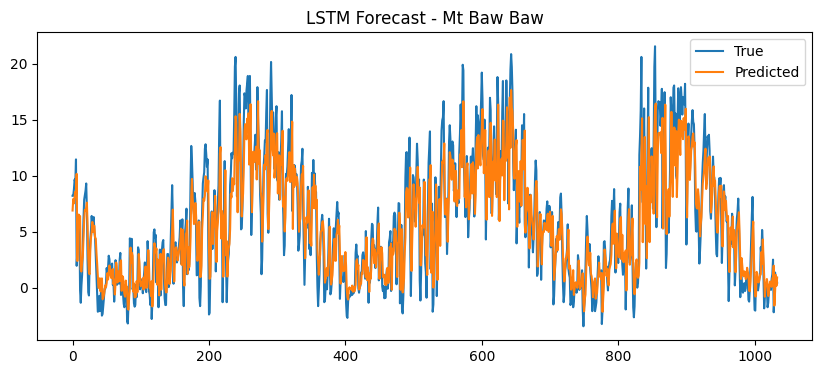

Training LSTM for Mt Buller ...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0389 - val_loss: 0.0127
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0172 - val_loss: 0.0107
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0158 - val_loss: 0.0100
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0149 - val_loss: 0.0090
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0132 - val_loss: 0.0077
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0115 - val_loss: 0.0073
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0100 - val_loss: 0.0067
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0097 - val_loss: 0.0054
Epoch 9/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0085 - val_loss: 0.0054
Epoch 10/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0086 - val_loss: 0.0051
Epoch 11/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0085 - val_loss: 0.0051
Epoch 12/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/ste

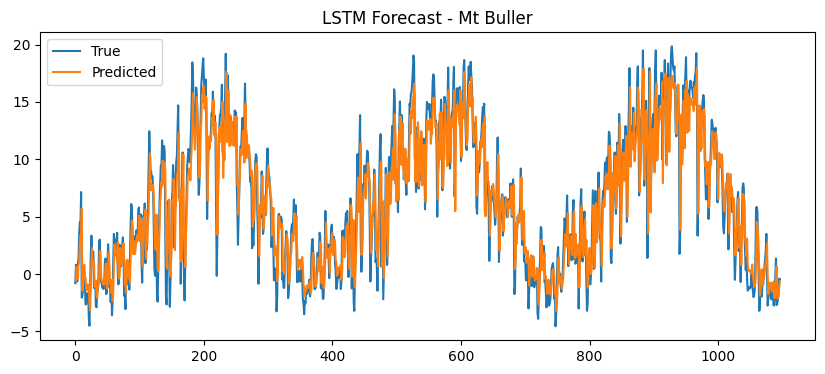

Training LSTM for Mt Hotham ...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0332 - val_loss: 0.0102
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0158 - val_loss: 0.0099
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0143 - val_loss: 0.0091
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0132 - val_loss: 0.0085
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0126 - val_loss: 0.0080
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0118 - val_loss: 0.0071
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0104 - val_loss: 0.0067
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0096 - val_loss: 0.0061
Epoch 9/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0085 - val_loss: 0.0060
Epoch 10/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0083 - val_loss: 0.0053
Epoch 11/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0081 - val_loss: 0.0051
Epoch 12/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/ste

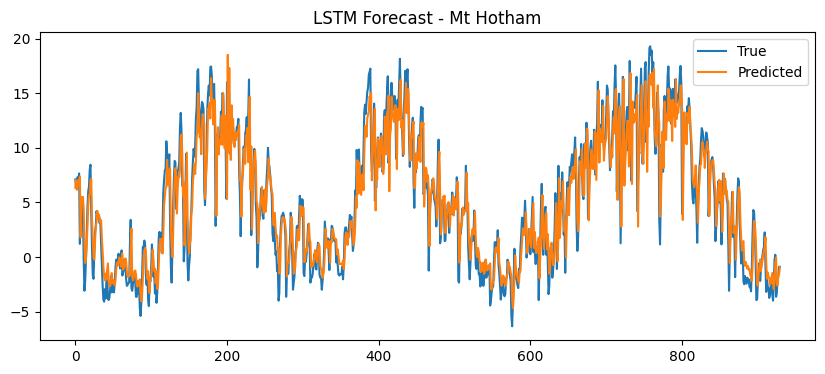

Training LSTM for Perisher ...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0512 - val_loss: 0.0076
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0111 - val_loss: 0.0075
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0107 - val_loss: 0.0074
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0105 - val_loss: 0.0072
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0099 - val_loss: 0.0068
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0098 - val_loss: 0.0066
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0093 - val_loss: 0.0061
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0086 - val_loss: 0.0061
Epoch 9/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0084 - val_loss: 0.0057
Epoch 10/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0080 - val_loss: 0.0058
Epoch 11/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0076 - val_loss: 0.0050
Epoch 12/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/ste

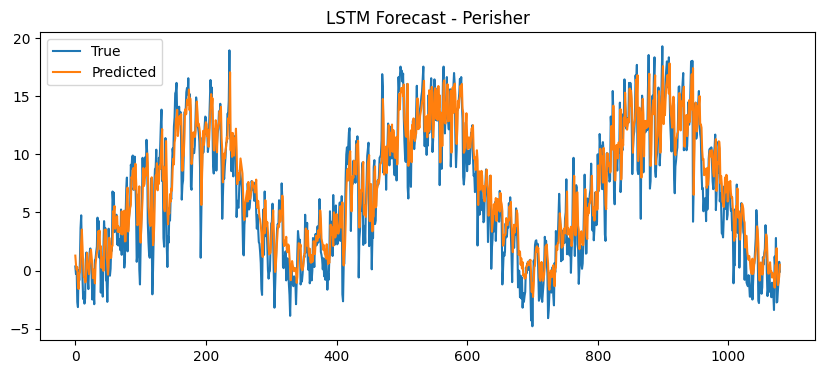

Training LSTM for Thredbo ...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0349 - val_loss: 0.0105
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0140 - val_loss: 0.0100
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0131 - val_loss: 0.0095
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0120 - val_loss: 0.0088
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0116 - val_loss: 0.0095
Epoch 6/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0108 - val_loss: 0.0079
Epoch 7/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0091 - val_loss: 0.0071
Epoch 8/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0087 - val_loss: 0.0063
Epoch 9/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0079 - val_loss: 0.0056
Epoch 10/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0080 - val_loss: 0.0054
Epoch 11/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0076 - val_loss: 0.0052
Epoch 12/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/ste

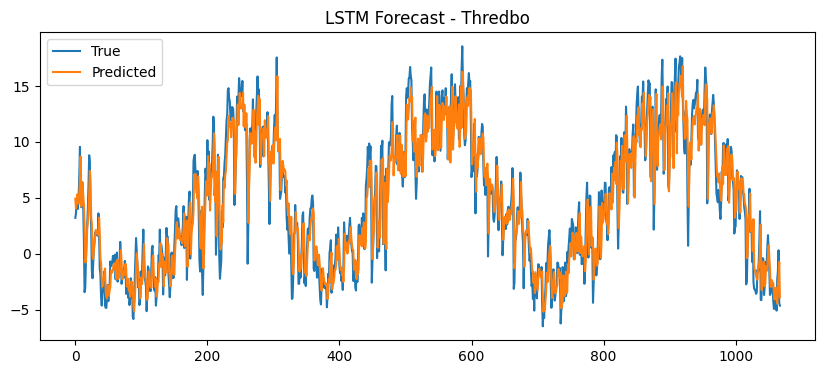

In [ ]:
for resort, df_resort in climate.groupby("Resort"):
    print(f"Training LSTM for {resort} ...")
    model, history, y_true, y_pred, mae, rmse, r2 = lstm_forecast_resort(df_resort, resort)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def lstm_forecast_resort(df_resort, resort_name, time_steps=30, epochs=20, batch_size=32):
    ts = df_resort.set_index("Date")["AvgTemp"].dropna().astype(float).sort_index()

    # Train/test split by date
    train = ts.loc[:'2023-12-31']
    test  = ts.loc['2024-01-01':'2025-12-31']

    # Scaling
    scaler = MinMaxScaler(feature_range=(0,1))
    train_scaled = scaler.fit_transform(train.values.reshape(-1,1))
    test_scaled  = scaler.transform(test.values.reshape(-1,1))

    # Build sequences
    def create_sequences(data, time_steps=time_steps):
        X, y = [], []
        for i in range(len(data) - time_steps):
            X.append(data[i:(i+time_steps), 0])
            y.append(data[i + time_steps, 0])
        return np.array(X), np.array(y)

    X_train, y_train = create_sequences(train_scaled, time_steps)
    X_test, y_test   = create_sequences(np.concatenate([train_scaled[-time_steps:], test_scaled]), time_steps)

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)

    # Predict test set
    y_pred = model.predict(X_test)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Metrics
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    r2 = r2_score(y_test_inv, y_pred_inv)

    print(f"{resort_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")

    # Plot test results
    plt.figure(figsize=(10,4))
    plt.plot(y_test_inv, label="True (2024–2025)")
    plt.plot(y_pred_inv, label="Predicted")
    plt.title(f"LSTM Validation - {resort_name}")
    plt.legend()
    plt.show()

    # === Forecast 2026 ===
    full_scaled = np.concatenate([train_scaled, test_scaled])

    def predict_future(model, data_scaled, scaler, time_steps=30, days=365):
        future_preds = []
        last_sequence = data_scaled[-time_steps:]
        for _ in range(days):
            X_input = last_sequence.reshape((1, time_steps, 1))
            pred = model.predict(X_input, verbose=0)
            future_preds.append(pred[0,0])
            last_sequence = np.append(last_sequence[1:], pred).reshape(-1,1)
        return scaler.inverse_transform(np.array(future_preds).reshape(-1,1))

    future_2026 = predict_future(model, full_scaled, scaler, time_steps=time_steps, days=365)
    dates_2026 = pd.date_range(start="2026-01-01", periods=365, freq="D")

    plt.figure(figsize=(12,5))
    plt.plot(dates_2026, future_2026, label="Predicted 2026")
    plt.title(f"LSTM Forecast 2026 - {resort_name}")
    plt.legend()
    plt.show()

    return model, mae, rmse, r2, future_2026


Training LSTM for Cabramurra ...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0304 - val_loss: 0.0123
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.0141 - val_loss: 0.0118
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0130 - val_loss: 0.0114
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.0120 - val_loss: 0.0100
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0112 - val_loss: 0.0090
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0102 - val_loss: 0.0078
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0093 - val_loss: 0.0070
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0086 - val_loss: 0.0064
Epoch 9/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0072 - val_loss: 0.0064
Epoch 10/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0078 - val_loss: 0.0062
Epoch 11/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0075 - val_loss: 0.0059
Epoch 12/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 

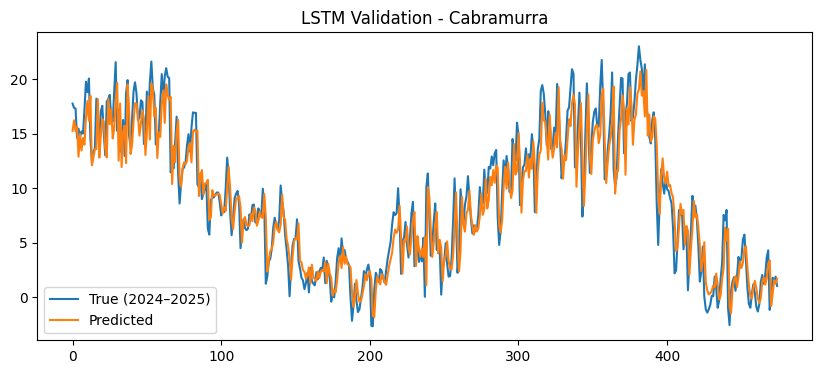

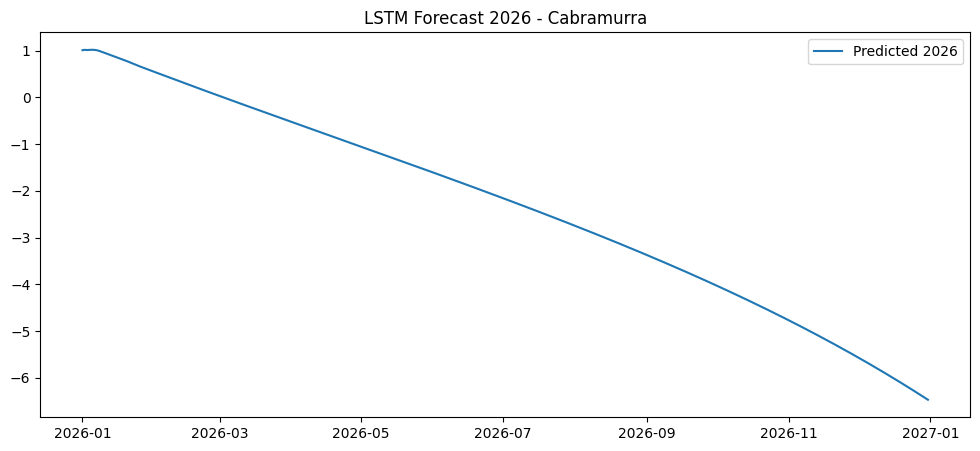

Training LSTM for Falls Creek ...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0429 - val_loss: 0.0149
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0142 - val_loss: 0.0141
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0144 - val_loss: 0.0133
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0138 - val_loss: 0.0124
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0120 - val_loss: 0.0105
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 0.0110 - val_loss: 0.0121
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0090 - val_loss: 0.0078
Epoch 9/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0082 - val_loss: 0.0072
Epoch 10/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0082 - val_loss: 0.0077
Epoch 11/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0078 - val_loss: 0.0070
Epoch 12/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/

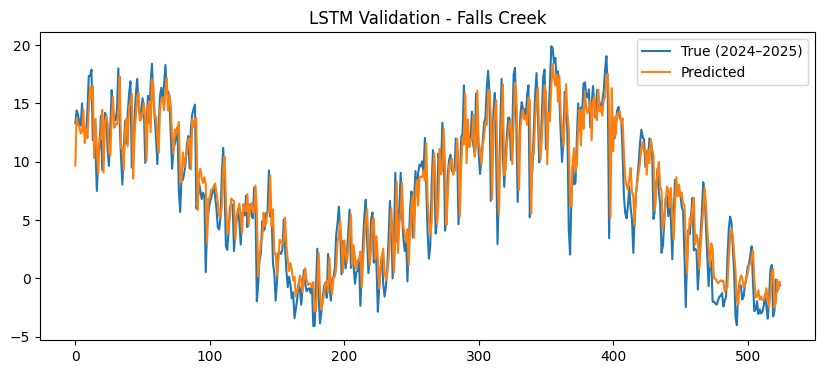

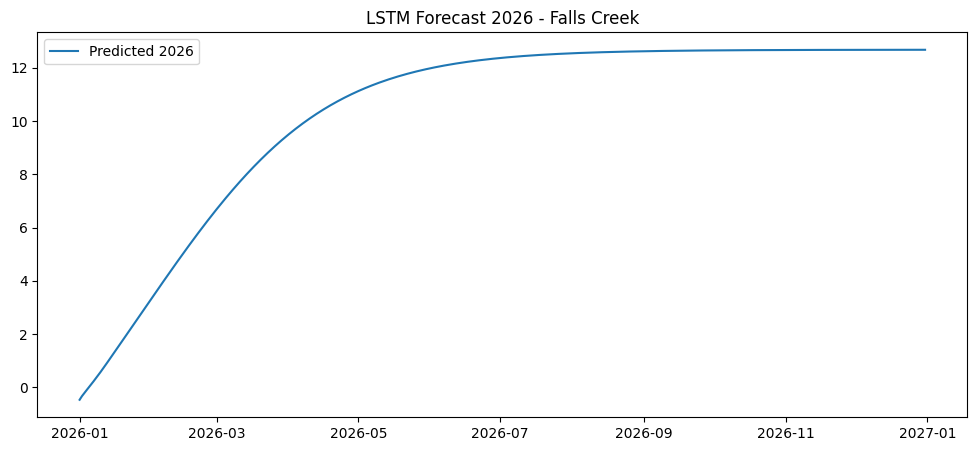

Training LSTM for Mt Baw Baw ...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0351 - val_loss: 0.0181
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0198 - val_loss: 0.0169
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0180 - val_loss: 0.0157
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0172 - val_loss: 0.0137
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0159 - val_loss: 0.0119
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0135 - val_loss: 0.0106
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0130 - val_loss: 0.0095
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0120 - val_loss: 0.0118
Epoch 9/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0117 - val_loss: 0.0092
Epoch 10/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0112 - val_loss: 0.0090
Epoch 11/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0115 - val_loss: 0.0090
Epoch 12/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/

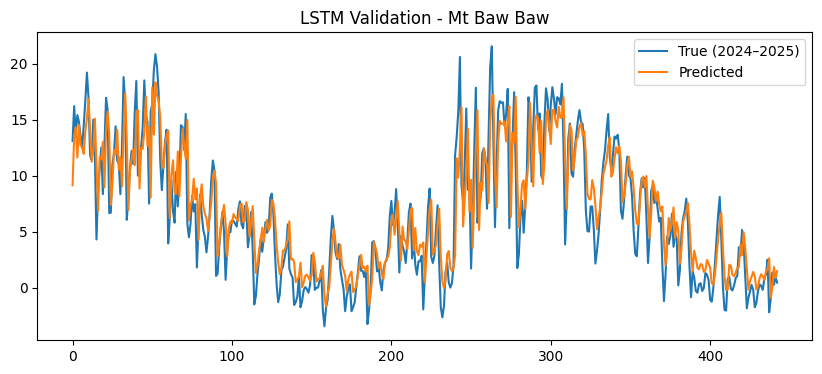

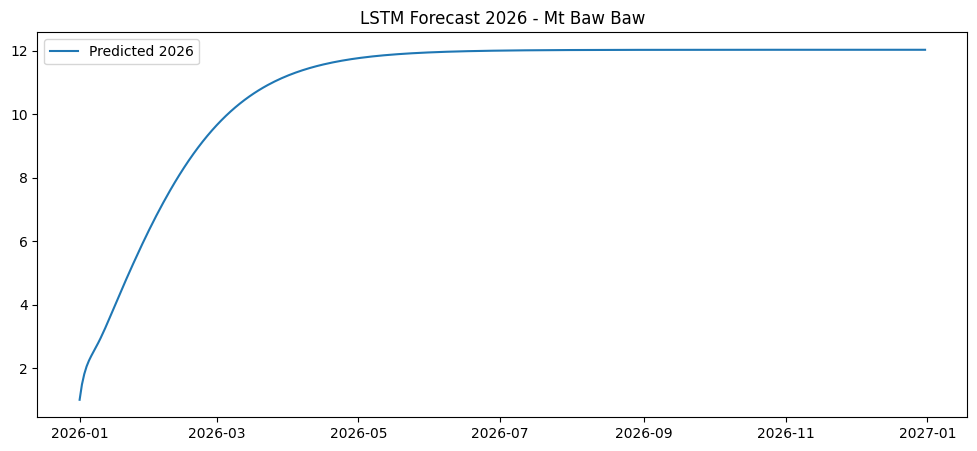

Training LSTM for Mt Buller ...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0394 - val_loss: 0.0153
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0161 - val_loss: 0.0137
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0151 - val_loss: 0.0122
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0122 - val_loss: 0.0097
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0106 - val_loss: 0.0084
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0093 - val_loss: 0.0075
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0089 - val_loss: 0.0071
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0086 - val_loss: 0.0068
Epoch 9/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0079 - val_loss: 0.0067
Epoch 10/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0084 - val_loss: 0.0071
Epoch 11/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 12/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/ste

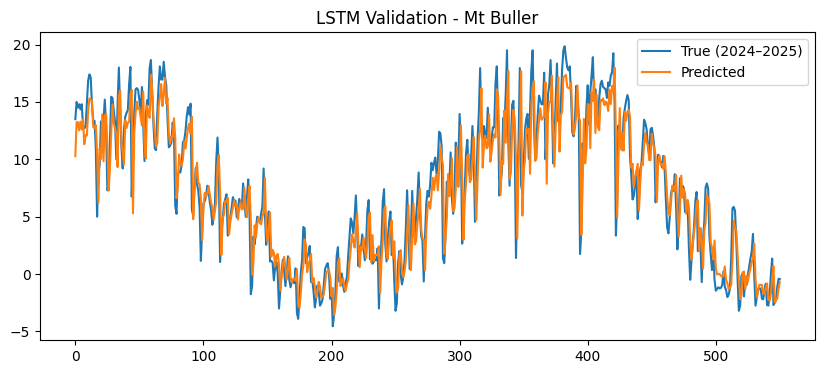

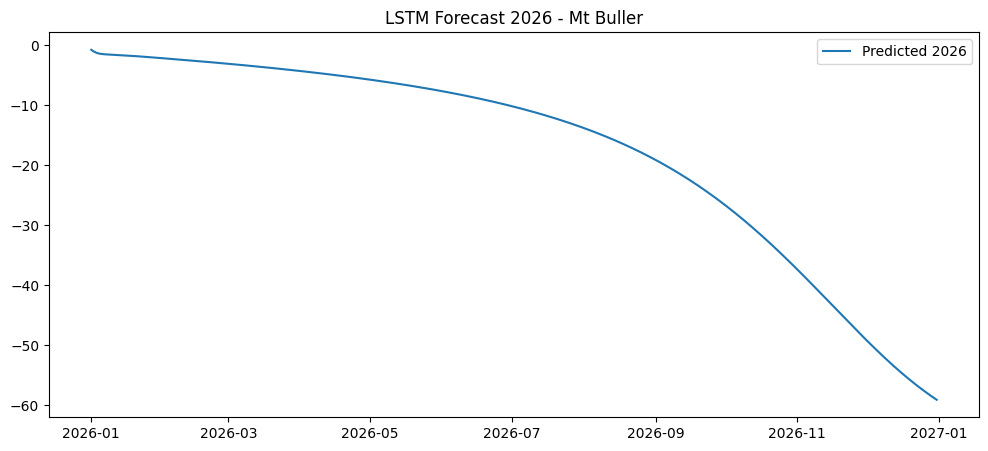

Training LSTM for Mt Hotham ...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0404 - val_loss: 0.0132
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0148 - val_loss: 0.0129
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0161 - val_loss: 0.0113
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0140 - val_loss: 0.0108
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0125 - val_loss: 0.0092
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0117 - val_loss: 0.0080
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0105 - val_loss: 0.0071
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0097 - val_loss: 0.0065
Epoch 9/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0095 - val_loss: 0.0061
Epoch 10/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0079 - val_loss: 0.0061
Epoch 11/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0081 - val_loss: 0.0056
Epoch 12/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/st

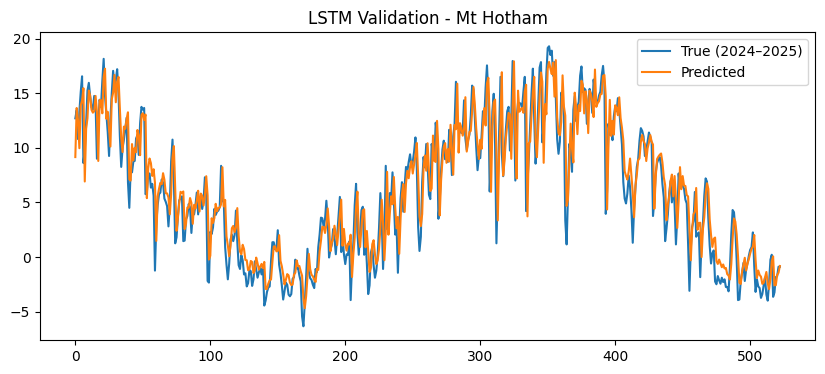

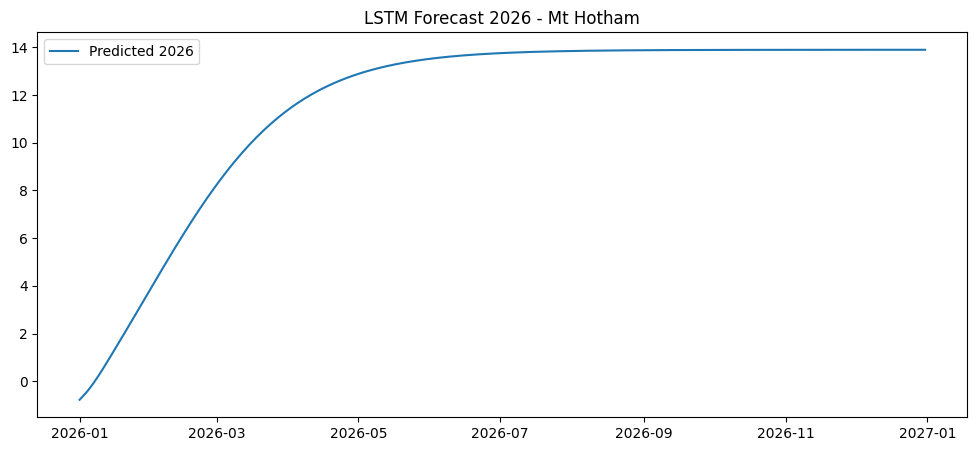

Training LSTM for Perisher ...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0434 - val_loss: 0.0098
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0108 - val_loss: 0.0096
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0107 - val_loss: 0.0089
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0098 - val_loss: 0.0082
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0100 - val_loss: 0.0086
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0090 - val_loss: 0.0069
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0085 - val_loss: 0.0066
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0077 - val_loss: 0.0059
Epoch 9/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0074 - val_loss: 0.0057
Epoch 10/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0068 - val_loss: 0.0054
Epoch 11/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0066 - val_loss: 0.0054
Epoch 12/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/s

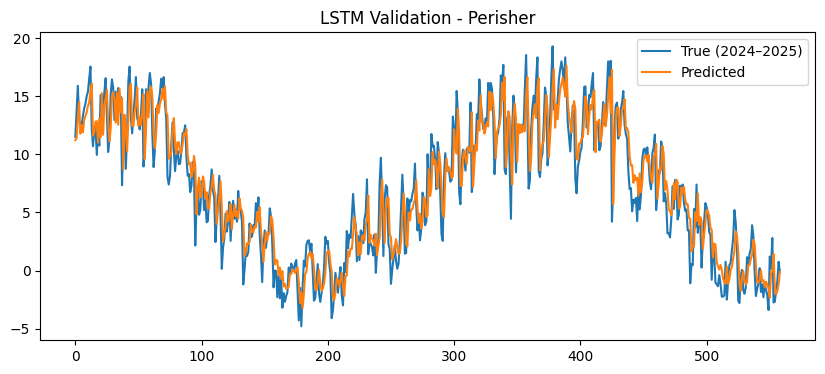

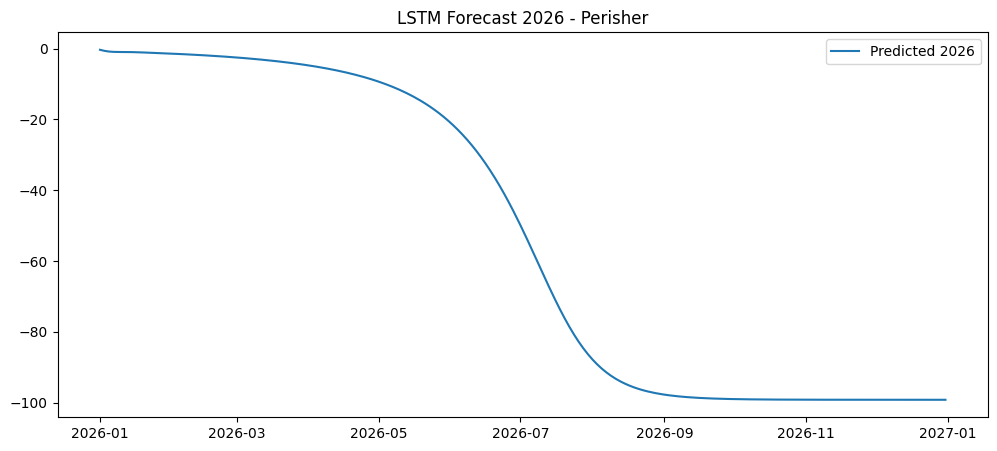

Training LSTM for Thredbo ...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0236 - val_loss: 0.0121
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0136 - val_loss: 0.0101
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0121 - val_loss: 0.0091
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0112 - val_loss: 0.0088
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0103 - val_loss: 0.0073
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0092 - val_loss: 0.0068
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0087 - val_loss: 0.0063
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0077 - val_loss: 0.0055
Epoch 9/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0074 - val_loss: 0.0053
Epoch 10/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0067 - val_loss: 0.0052
Epoch 11/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0074 - val_loss: 0.0051
Epoch 12/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/

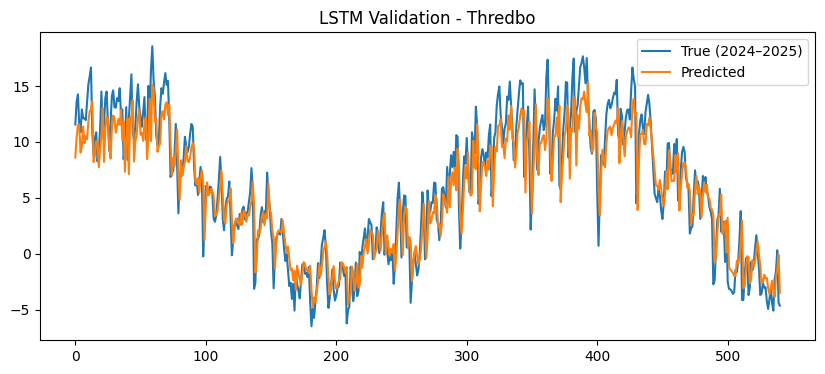

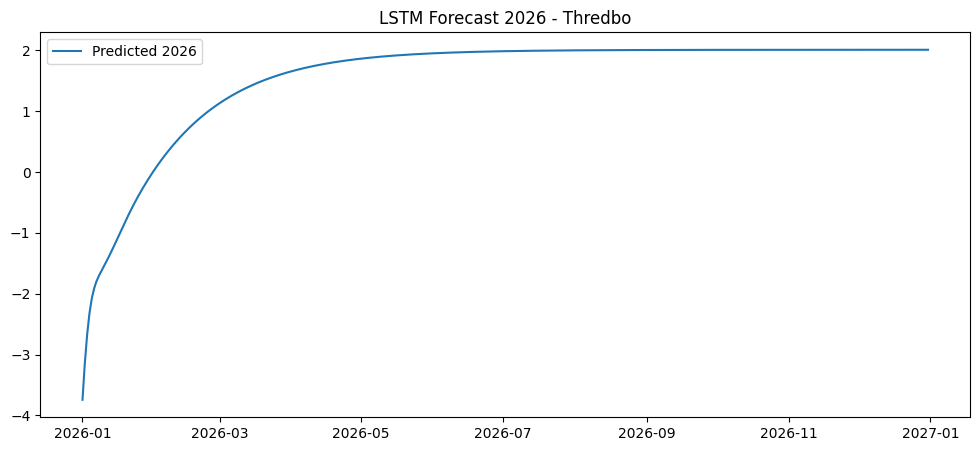

In [ ]:
results = {}
for resort, df_resort in climate.groupby("Resort"):
    print(f"Training LSTM for {resort} ...")
    model, mae, rmse, r2, forecast_2026 = lstm_forecast_resort(df_resort, resort)
    results[resort] = {"MAE": mae, "RMSE": rmse, "R2": r2, "2026 Forecast": forecast_2026}


**Rainfall Forecast**

We performed XGBoost (Extreme Gradient Boosting), which is a tree-based ensemble method.

1. lassification Accuracy (Rain vs No Rain):

If balanced dataset, you should get a good accuracy score (typically 70–85%).

2. Feature Importance:

Likely Month and Previous Rainfall are strong predictors (since rainfall is seasonal).

3. Forecasting:

You can use the trained model to predict future rainfall patterns at the station level.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
unclean=pd.read_excel("2025 Allianz Datathon Dataset.xlsx", sheet_name= "Climate Data")
clean = unclean.drop(columns=['Maximum temperature (Degree C)', 'Minimum temperature (Degree C)'])
clean.to_csv("rainfall data.csv", index = False)
clean=pd.read_csv("rainfall data.csv")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# -------------------------
# 1. Load Data
# -------------------------
df = pd.read_csv("rainfall data.csv")

# Choose ONE station
station_id = 71075

if station_id not in df['Bureau of Meteorology station number'].unique():
    raise ValueError(f"Station {station_id} not found in dataset!")

df = df[df['Bureau of Meteorology station number'] == station_id].copy()

# Build date column
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df = df.sort_values('date')

# -------------------------
# 2. Feature Engineering
# -------------------------
df['dayofyear'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
df['sin_dayofyear'] = np.sin(2 * np.pi * df['dayofyear'] / 365.25)
df['cos_dayofyear'] = np.cos(2 * np.pi * df['dayofyear'] / 365.25)

# Lag features
for lag in [1, 3, 7]:
    df[f'lag_{lag}'] = df['Rainfall amount (millimetres)'].shift(lag)

# Rolling mean (smaller window for safety)
df['rolling_3d'] = df['Rainfall amount (millimetres)'].shift(1).rolling(3).mean()

# Drop NA rows
df = df.dropna()

# Ensure enough rows exist
if len(df) < 20:  # arbitrary minimum threshold
    raise ValueError(f"Not enough data for station {station_id} after processing!")

# -------------------------
# 3. Define Targets
# -------------------------
df['rain_flag'] = (df['Rainfall amount (millimetres)'] > 0).astype(int)

features = ['month', 'sin_dayofyear', 'cos_dayofyear',
            'lag_1', 'lag_3', 'lag_7', 'rolling_3d']

X = df[features]
y_class = df['rain_flag']
y_reg = df['Rainfall amount (millimetres)']

# -------------------------
# 4. Train/Validation/Test Split by Year
# -------------------------
train = df[df['Year'] <= 2022]
valid = df[df['Year'] == 2023]
test  = df[df['Year'] >= 2024]

X_train, y_class_train, y_reg_train = train[features], train['rain_flag'], train['Rainfall amount (millimetres)']
X_valid, y_class_valid, y_reg_valid = valid[features], valid['rain_flag'], valid['Rainfall amount (millimetres)']
X_test,  y_class_test,  y_reg_test  = test[features],  test['rain_flag'],  test['Rainfall amount (millimetres)']

# Skip station if train set is empty
if len(X_train) == 0:
    raise ValueError(f"No training data for station {station_id} after splitting!")

# -------------------------
# 5. Step 1 – Classifier
# -------------------------
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_class_train)

rain_pred_class = clf.predict(X_valid)
print("Classifier Accuracy:", accuracy_score(y_class_valid, rain_pred_class))
print("\nConfusion Matrix:\n", confusion_matrix(y_class_valid, rain_pred_class))
print("\nClassification Report:\n", classification_report(y_class_valid, rain_pred_class))

# -------------------------
# 6. Step 2 – Regressor (on rainy days only)
# -------------------------
rainy_idx = y_class_train == 1

if len(X_train[rainy_idx]) == 0:
    print(f"No rainy days in training for station {station_id} – skipping regression.")
    final_pred = np.zeros(len(X_valid))
else:
    reg = xgb.XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    reg.fit(X_train[rainy_idx], y_reg_train[rainy_idx])

    # -------------------------
    # 7. Combine Predictions on Validation
    # -------------------------
    final_pred = []
    for i in range(len(X_valid)):
        if rain_pred_class[i] == 0:   # predicted no rain
            final_pred.append(0.0)
        else:                         # predicted rain → predict amount
            final_pred.append(reg.predict(X_valid.iloc[[i]])[0])
    final_pred = np.array(final_pred)

# Evaluate
mae = mean_absolute_error(y_reg_valid, final_pred)
print(f"Two-Step Model MAE (Validation) for station {station_id}: {mae:.3f} mm")


Classifier Accuracy: 0.6288951841359773

Confusion Matrix:
 [[127  53]
 [ 78  95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.66       180
           1       0.64      0.55      0.59       173

    accuracy                           0.63       353
   macro avg       0.63      0.63      0.63       353
weighted avg       0.63      0.63      0.63       353

Two-Step Model MAE (Validation) for station 71075: 7.937 mm


In [ ]:
import pandas as pd
import numpy as np

def predict_future_rainfall(clf, reg, df, future_dates):
    """
    Predict rainfall for a station using a trained two-step model.

    Parameters:
    - clf: trained classifier (rain/no rain)
    - reg: trained regressor (rainfall amount)
    - df: historical DataFrame for the station (must include 'Rainfall amount (millimetres)')
    - future_dates: list or pd.DatetimeIndex of dates to predict

    Returns:
    - DataFrame with predicted rainfall
    """

    # Sort historical data
    df = df.sort_values('date')

    # Initialize features for prediction
    future_df = pd.DataFrame({'date': future_dates})
    future_df['month'] = future_df['date'].dt.month
    future_df['dayofyear'] = future_df['date'].dt.dayofyear
    future_df['sin_dayofyear'] = np.sin(2 * np.pi * future_df['dayofyear'] / 365.25)
    future_df['cos_dayofyear'] = np.cos(2 * np.pi * future_df['dayofyear'] / 365.25)

    # Initialize lags & rolling
    lag_1 = df['Rainfall amount (millimetres)'].iloc[-1]
    lag_3 = df['Rainfall amount (millimetres)'].iloc[-3] if len(df) >= 3 else lag_1
    lag_7 = df['Rainfall amount (millimetres)'].iloc[-7] if len(df) >= 7 else lag_1
    rolling_3d = df['Rainfall amount (millimetres)'].iloc[-3:].mean()

    predictions = []

    for i in range(len(future_df)):
        X_day = pd.DataFrame({
            'month': [future_df['month'].iloc[i]],
            'sin_dayofyear': [future_df['sin_dayofyear'].iloc[i]],
            'cos_dayofyear': [future_df['cos_dayofyear'].iloc[i]],
            'lag_1': [lag_1],
            'lag_3': [lag_3],
            'lag_7': [lag_7],
            'rolling_3d': [rolling_3d]
        })

        # Step 1: classifier
        rain_flag = clf.predict(X_day)[0]

        # Step 2: regressor if rainy
        if rain_flag == 0:
            pred = 0.0
        else:
            pred = reg.predict(X_day)[0]

        predictions.append(pred)

        # Update lags & rolling for next day
        lag_7, lag_3, lag_1 = lag_3, lag_1, pred
        rolling_3d = np.mean([lag_1, lag_3, lag_7])

    future_df['predicted_rainfall_mm'] = predictions
    return future_df[['date', 'predicted_rainfall_mm']]

future_dates = pd.date_range(start="2026-01-01", end="2026-12-31")
future_rainfall = predict_future_rainfall(clf, reg, df, future_dates)
print(future_rainfall)

          date  predicted_rainfall_mm
0   2026-01-01              26.692297
1   2026-01-02               0.000000
2   2026-01-03               0.000000
3   2026-01-04               0.000000
4   2026-01-05               3.418439
..         ...                    ...
360 2026-12-27               0.000000
361 2026-12-28               1.785864
362 2026-12-29               0.000000
363 2026-12-30               0.000000
364 2026-12-31               0.000000

[365 rows x 2 columns]


In [ ]:
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report

def evaluate_rainfall_model(clf, reg, df, features, year=2023):
    """
    Evaluate two-step rainfall model on historical data (where ground truth exists).

    Parameters:
    - clf: trained classifier
    - reg: trained regressor
    - df: full station dataframe (with engineered features)
    - features: list of feature column names
    - year: which year to evaluate (default 2023 for validation)

    Returns:
    - DataFrame with predictions + actuals
    - Prints accuracy + MAE
    """
    test = df[df['Year'] == year].copy()
    X_test = test[features]
    y_class_test = test['rain_flag']
    y_reg_test = test['Rainfall amount (millimetres)']

    # Step 1: classifier
    rain_pred_class = clf.predict(X_test)

    # Step 2: regression on rainy days
    final_pred = []
    for i in range(len(X_test)):
        if rain_pred_class[i] == 0:
            final_pred.append(0.0)
        else:
            final_pred.append(reg.predict(X_test.iloc[[i]])[0])
    final_pred = np.array(final_pred)

    # --- Classification metrics ---
    print("\nClassifier Performance:")
    print("Accuracy:", accuracy_score(y_class_test, rain_pred_class))
    print("Confusion Matrix:\n", confusion_matrix(y_class_test, rain_pred_class))
    print("Classification Report:\n", classification_report(y_class_test, rain_pred_class))

    # --- Regression metrics ---
    mae = mean_absolute_error(y_reg_test, final_pred)
    print(f"Two-Step Model MAE ({year}): {mae:.3f} mm")

    # Return results DataFrame
    results = test[['date','Rainfall amount (millimetres)']].copy()
    results['predicted_rainfall_mm'] = final_pred
    return results

In [ ]:
features = ['month','sin_dayofyear','cos_dayofyear','lag_1','lag_3','lag_7','rolling_3d']

# Evaluate on validation year (2023)
validation_results = evaluate_rainfall_model(clf, reg, df, features, year=2023)

# Evaluate on test year (2024)
test_results = evaluate_rainfall_model(clf, reg, df, features, year=2024)



Classifier Performance:
Accuracy: 0.6288951841359773
Confusion Matrix:
 [[127  53]
 [ 78  95]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.66       180
           1       0.64      0.55      0.59       173

    accuracy                           0.63       353
   macro avg       0.63      0.63      0.63       353
weighted avg       0.63      0.63      0.63       353

Two-Step Model MAE (2023): 7.937 mm

Classifier Performance:
Accuracy: 0.592948717948718
Confusion Matrix:
 [[125  61]
 [ 66  60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66       186
           1       0.50      0.48      0.49       126

    accuracy                           0.59       312
   macro avg       0.58      0.57      0.57       312
weighted avg       0.59      0.59      0.59       312

Two-Step Model MAE (2024): 7.657 mm


The results shows that the rainfall forecast model achieved ~63% accuracy in 2023 but dropped to ~59% in 2024, with weak rain detection (low recall), showing it is biased toward predicting no-rain; improvements require handling class imbalance and adding seasonal/lagged features.
Then, save as csv file.

In [ ]:
# Merge rainfall predictions into climate 2026 dataset
climate_2026 = pd.merge(
    climate_2026,
    future_rainfall.rename(columns={"date":"Date"}),
    on="Date",
    how="left"
)

# Save final CSV
climate_2026.to_csv("climate_rainfall_2026.csv", index=False)
print("climate_rainfall_2026.csv")

climate_rainfall_2026.csv
